In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
pio.templates.default = "plotly_dark"

## Customer Churn Analysis: Identifying Risk Factors and Opportunities

In today's highly competitive banking industry, retaining existing customers is crucial for maintaining profitability and growth. Customer churn, or the loss of customers to competitors, can have a significant impact on a bank's bottom line. Therefore, it is imperative to understand the factors that contribute to customer churn and develop strategies to mitigate this risk.

In [55]:
# Load data 
data = pd.read_csv('train.csv.zip')

data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [57]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [58]:
# Calculate class distribution
class_counts = data['Exited'].value_counts()
total_count = len(data)

print("Class Distribution:")
for cls, count in class_counts.items():
    proportion = (count / total_count) * 100
    print(f"{cls}: {count} ({proportion:.1f}%)")



Class Distribution:
0: 130113 (78.8%)
1: 34921 (21.2%)


This distribution reveals an imbalance in our dataset, with the majority class (non-churners) representing nearly 79% of the observations, while the minority class (churners) accounts for only 21.2%.

Class imbalance is a common challenge in many real-world classification problems, and it can have significant implications for our data science decisions and modeling approaches. Here's why:

1. **Biased Model Performance**: If we train a classification model on this imbalanced dataset without any adjustments, the model is likely to be biased towards the majority class (non-churners). This is because the model will tend to optimize for overall accuracy, which can be achieved by simply predicting the majority class for most instances. However, this approach may result in poor performance in identifying the minority class (churners), which is often the class of greater interest and importance.

2. **Skewed Evaluation Metrics**: Evaluation metrics like accuracy can be misleading when dealing with imbalanced datasets. For example, if our model predicts all instances as non-churners, it would achieve an accuracy of 78.8%, which may seem reasonable at first glance. However, this model would completely fail to identify any churners, rendering it useless for our purposes.

3. **Potential for Overfitting**: When training on imbalanced datasets, models may overfit to the majority class, leading to poor generalization performance on unseen data, especially for the minority class instances.

To address these challenges and ensure our models are effective in identifying potential churners, we need to consider various techniques and strategies:

1. **Resampling Techniques**: Methods like oversampling the minority class (e.g., SMOTE) or undersampling the majority class can help balance the class distribution in our training data. This can improve the model's ability to learn patterns from both classes effectively.

2. **Evaluation Metric Selection**: Instead of relying solely on accuracy, we should consider using evaluation metrics that are more appropriate for imbalanced datasets, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC). These metrics provide a more comprehensive assessment of the model's performance on both classes.

3. **Ensemble Methods**: Techniques like bagging, boosting, or stacking can help mitigate the effects of class imbalance by combining multiple models trained on different subsets or variations of the data.

By addressing the class imbalance in our dataset, we can develop more robust and effective models for predicting customer churn. This, in turn, will enable us to make more informed decisions regarding customer retention strategies, targeted interventions, and resource allocation.

## Visualizations

In [120]:
def plot_histogram_churn(column, title, discrete=False, kde=True):
    fig, ax = plt.subplots(figsize=(10, 6))

    data['Exited'] = data['Exited'].astype('category')
    data['Exited'] = data['Exited'].cat.rename_categories({0: 'Not Churn', 1: 'Churn'})

    sns.histplot(data=data, x=column, hue='Exited', kde=kde, stat='percent', common_norm=False, discrete=discrete)

    ax.set_title(f'Comparative Percentage Distribution of {title} by Customer Churn Status', fontsize=14)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Percentage', fontsize=14)
    
    plt.show()



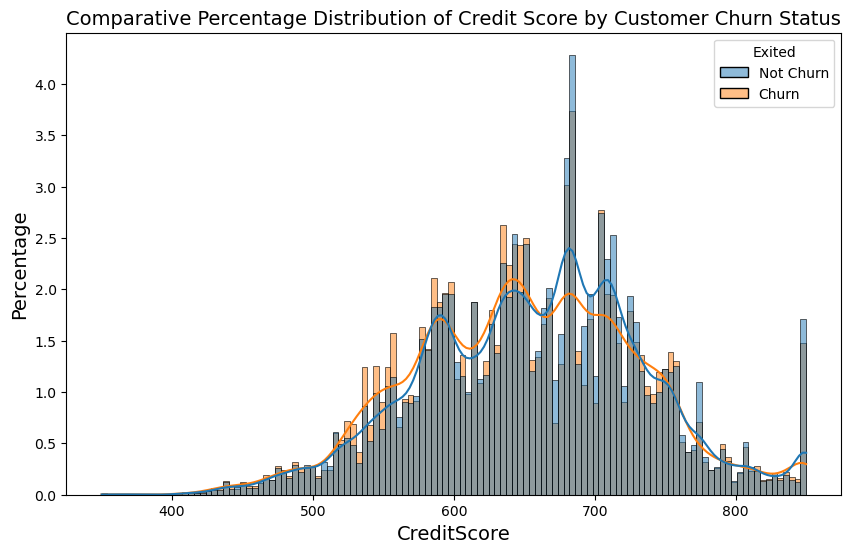

In [118]:
plot_histogram_churn('CreditScore', 'Credit Score', discrete=False, kde=True)

By comparing the relative heights of the orange and blue bars across different credit score ranges, you can identify potential risk zones or credit score thresholds where customers are more or less likely to churn. This information can be valuable for targeted retention efforts, customer segmentation, and feature engineering. 

 If the orange bars (representing churners) are taller than the blue bars (representing non-churners) in a particular credit score range, it indicates that customers within that credit score range have a higher propensity to churn or close their accounts.

 Conversely, if the blue bars are taller than the orange bars in a specific credit score range, it suggests that customers within that credit score range are less likely to churn and tend to remain as customers.

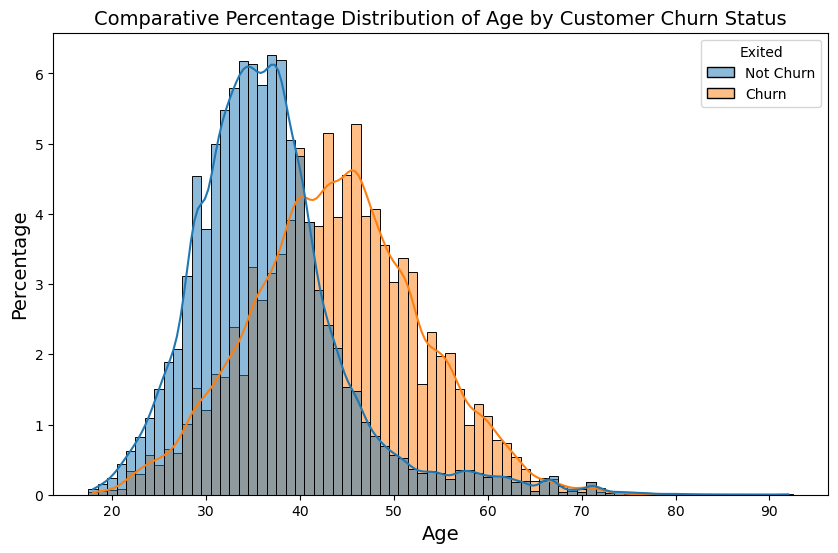

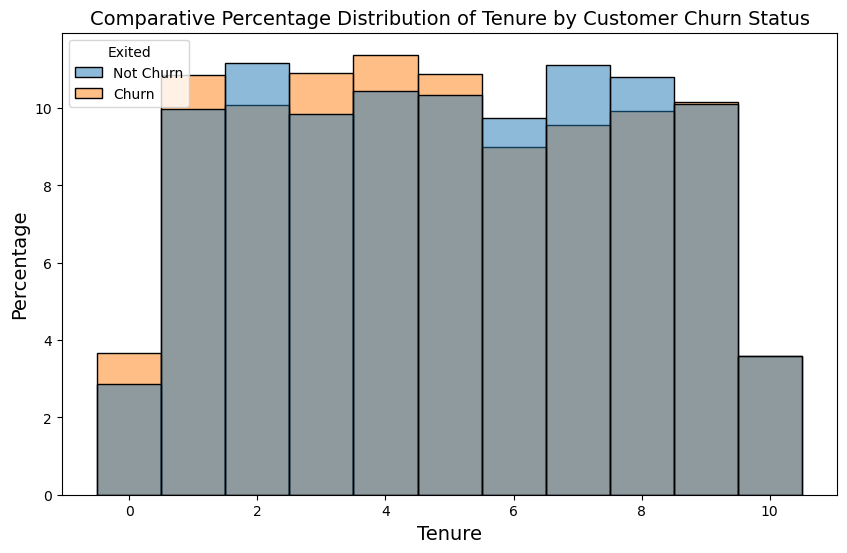

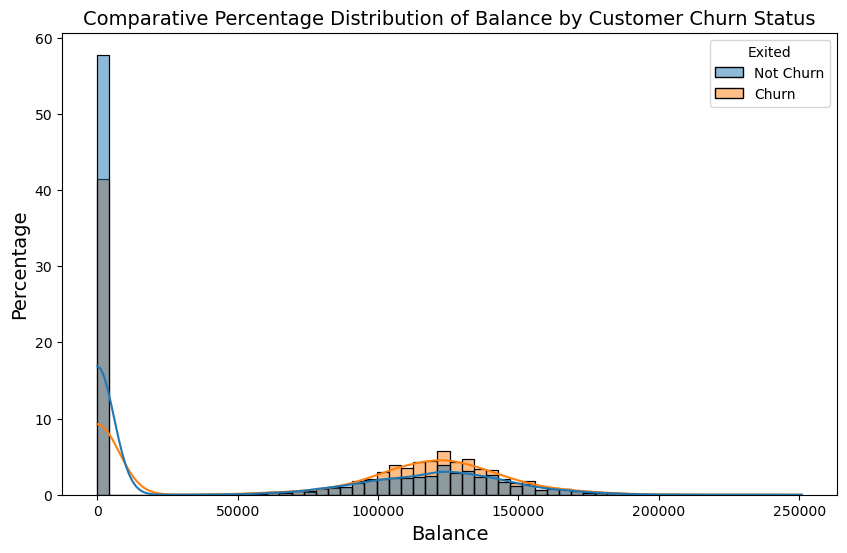

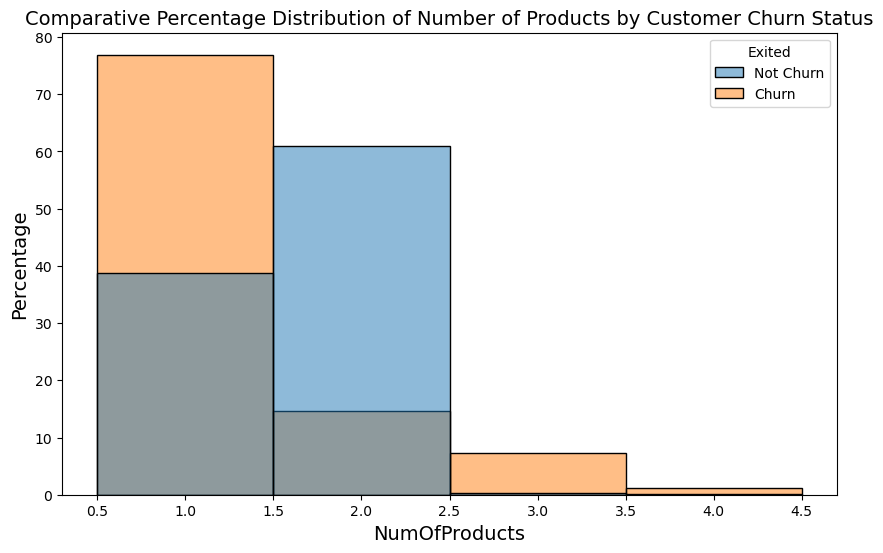

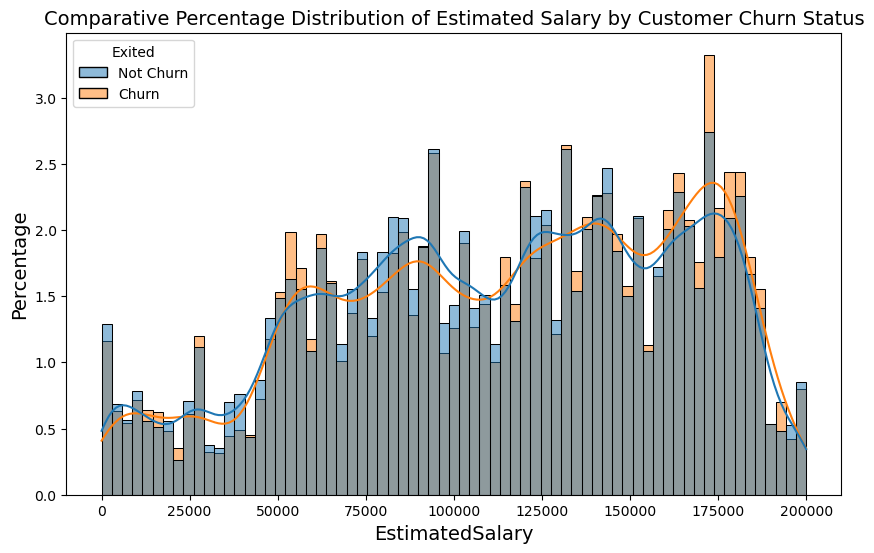

In [121]:
# Plot histograms for each numeric feature
plot_histogram_churn('Age', 'Age', discrete=True, kde=True)
plot_histogram_churn('Tenure', 'Tenure', discrete=True, kde=False)
plot_histogram_churn('Balance', 'Balance', discrete=False, kde=True)
plot_histogram_churn('NumOfProducts', 'Number of Products', discrete=True, kde=False)
plot_histogram_churn('EstimatedSalary', 'Estimated Salary', discrete=False, kde=True)



In [ ]:
# EDA
print(data.head())
print(data.info())
print(data.describe())

# Split features and target
X = data.drop('Churn', axis=1) 
y = data['Churn']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Fine-tune 
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))